In [ ]:
!pip install sdv
!pip uninstall numpy -y
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 4.4 MB/s 
     |████████████████████████████████| 1.2 MB 28.9 MB/s 
     |████████████████████████████████| 98 kB 8.1 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 11.2 MB 48.5 MB/s 
     |████████████████████████████████| 944 kB 36.9 MB/s 
     |████████████████████████████████| 636 kB 27.9 MB/s 
     |████████████████████████████████| 281 kB 46.6 MB/s 
     |████████████████████████████████| 2.5 MB 42.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successf

Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Successfully uninstalled numpy-1.21.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 5.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
#df = pd.read_csv('/content/dataset_final.csv')
df = pd.read_csv('/content/final_pred_model_dataset.csv')

In [ ]:
df.head(20)

,Dataset,Size,NB,Bert_1,Bert_2,Albert_1,Albert_2,XLNet_1,XLNet_2,NB_time,Bert_1_time,Bert_2_time,Albert_1_time,Albert_2_time,XLNet_1_time,XLNet_2_time,Unnamed: 16,best accuracy,Unnamed: 18,best time
0,airline_tweets,14640,0.6605,0.8350,0.8264,0.8346,0.8207,0.8189,0.8275,0.1351,501.1543,482.6537,500.8666,300.4958,439.5199,430.3279,NaN,1,NaN,300.4958
1,amazon_product_review,22641,0.5990,0.9050,0.8804,0.8975,0.8036,0.8854,0.9029,0.4730,500.5851,500.7417,518.0940,311.4551,448.8743,448.9021,NaN,1,NaN,311.4551
2,coronavirus_tweets,41159,0.3475,0.5939,0.4936,0.6493,0.5100,0.4500,0.5104,0.2484,511.7019,516.7167,529.1710,316.9867,463.6896,454.1920,NaN,3,NaN,316.9867
3,inshort_news,4817,0.8610,0.9442,0.9431,0.9454,0.8832,0.9217,0.9437,0.1785,321.2276,321.1591,326.7332,196.3462,279.2409,279.2238,NaN,3,NaN,196.3462
4,disaster_tweets,11370,0.8520,0.9129,0.9136,0.9125,0.9075,0.8989,0.9054,0.1672,507.3875,507.1221,519.9831,312.1041,445.3390,445.5262,NaN,2,NaN,312.1041
5,nykaa_review,155544,0.7580,0.7743,0.7764,0.7564,0.7732,0.7696,0.7850,0.0902,496.3858,489.5603,502.3225,301.3728,445.9857,436.5006,NaN,6,NaN,301.3728
6,product_sentiment,6364,0.6512,0.7038,0.7051,0.7083,0.6966,0.6881,0.7011,0.0924,395.4590,376.2375,391.1370,235.0882,347.7264,339.2447,NaN,3,NaN,235.0882
7,clickbait_dataset,5000,0.9520,0.9811,0.9794,0.9834,0.9749,0.9863,0.9891,0.0552,318.4037,303.2988,313.8886,187.4957,277.2519,268.4644,NaN,6,NaN,187.4957
8,fake_news,4997,0.8510,0.9657,0.9531,0.9743,0.9788,0.9748,0.9834,1.4551,344.8036,330.1537,336.6970,202.6844,296.5957,287.9104,NaN,6,NaN,202.6844
9,stock_market_sentiment,5791,0.7170,0.8046,0.7765,0.7859,0.6956,0.7242,0.7568,0.0648,355.2241,355.0215,365.5839,220.1775,314.0790,314.1275,NaN,1,NaN,220.1775


In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

df = df[['Size','NB','Albert_2','best accuracy']]
df.rename(columns = {'best accuracy':'target'}, inplace = True)

df[['Size', 'NB', 'Albert_2']] = s.fit_transform(df[['Size', 'NB', 'Albert_2']])
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Size,NB,Albert_2,target
0,-0.170559,-0.214897,0.369069,1
1,-0.119226,-0.531848,0.271532,1
2,-0.000417,-1.827998,-1.403138,3
3,-0.233583,0.818416,0.725564,3
4,-0.191539,0.772033,0.864169,2


<AxesSubplot:title={'center':'Count (target)'}>

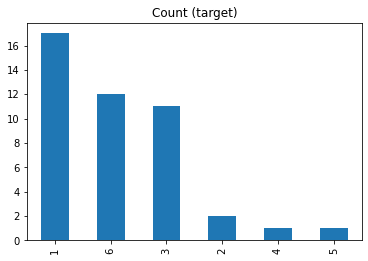

In [ ]:
df['target'].value_counts().plot(kind='bar', title='Count (target)')

<AxesSubplot:title={'center':'Count (target)'}>

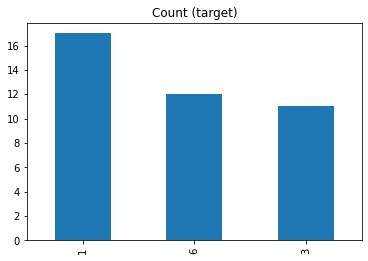

In [ ]:
df = df[df.target != 2]
df = df[df.target != 4]
df = df[df.target != 5]

df['target'].value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Size', 'NB', 'Albert_2']], df['target'], test_size=8, random_state=4)

<AxesSubplot:title={'center':'Count (target)'}>

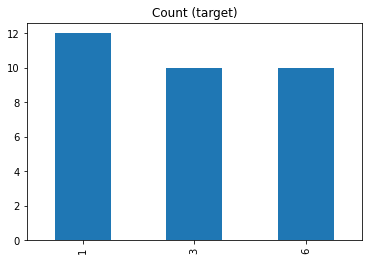

In [ ]:
y_train.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
df['target'] = le.transform(df['target'])
pd.Series(y_train)

0     0
1     1
2     1
3     0
4     2
5     0
6     0
7     2
8     0
9     0
10    2
11    2
12    2
13    0
14    0
15    2
16    1
17    0
18    1
19    2
20    2
21    2
22    1
23    1
24    0
25    1
26    2
27    1
28    0
29    1
30    0
31    1
dtype: int64

<AxesSubplot:title={'center':'Count (target)'}>

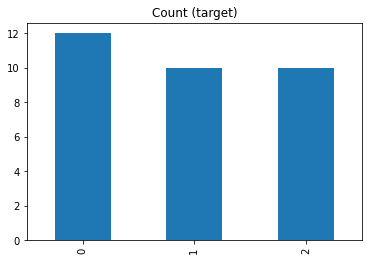

In [ ]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(16, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(n_outputs, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import statistics

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

models = [
    LogisticRegression(multi_class='multinomial'),
    XGBClassifier(
        max_depth=6,
        gamma=2,
        eta=0.8,
        reg_alpha=0.5,
        reg_lambda=0.5
      ),
    # LogisticRegression(),
    svm.SVC(decision_function_shape='ovr', probability=True),
    RandomForestClassifier(n_estimators=10),
    AdaBoostClassifier(n_estimators=25, learning_rate=2),
    get_model(X_train.shape[1], 1)
]

# preds = pd.DataFrame()
acc_arr = []
for i in range(10):
  preds = []
  weights = [1, 1, 1, 1, 1, 1, 1, 1, 1]
  for i, m in enumerate(models):
    if i == len(models)-1:
      m.fit(X_train, y_train, epochs = 50)
      preds.append(m.predict(X_test[['Size','NB', 'Albert_2']]) * weights[i])
    else:
      m.fit(X_train, y_train)
      preds.append(m.predict_proba(X_test[['Size','NB', 'Albert_2']]) * weights[i])


  preds_ensemble = [sum(items)/sum(weights) for items in zip(*preds)]
  preds_ensemble = np.argmax(preds_ensemble, axis=1)
  # preds_ensemble = le.inverse_transform(preds_ensemble)
  print('Pred:', list(preds_ensemble))
  acc = accuracy_score(y_test, preds_ensemble)
  print('Real:', list(y_test))
  print(acc)
  acc_arr.append(acc)

print("Average accuracy:", statistics.mean(acc_arr))
                 

Epoch 1/50
1/1 [==============================] - 1s 501ms/step - loss: 2.9696
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 2.8977
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 2.8271
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 2.7576
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 2.6892
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 2.6224
Epoch 7/50
1/1 [==============================] - 0s 11ms/step - loss: 2.5571
Epoch 8/50
1/1 [==============================] - 0s 14ms/step - loss: 2.4933
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 2.4302
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 2.3678
Epoch 11/50
1/1 [==============================] - 0s 16ms/step - loss: 2.3064
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 2.2465
Epoch 13/50
1/1 [==============================] - 0s 11ms/s

# GAN Experiment

In [ ]:
# data_gan = pd.DataFrame(X_train)
# data_gan['target'] = y_train
data_gan = df.copy()
data_gan.head()

,Size,NB,Albert_2,target
0,-0.170559,-0.214897,0.369069,0
1,-0.119226,-0.531848,0.271532,0
2,-0.000417,-1.827998,-1.403138,1
3,-0.233583,0.818416,0.725564,1
5,0.733464,0.287587,0.098133,2


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sdv.tabular import CTGAN, CopulaGAN
from sdv.evaluation import evaluate

generated_data = pd.DataFrame()
for i in data_gan['target'].unique():
  data_1 = data_gan[data_gan.iloc[:, -1] == i]
  d = data_1.copy()
  # if len(data_1) < 3:
  #   continue
  while len(data_1) < 10:
    row = d.sample(1)
    data_1 = pd.concat([data_1, row], ignore_index=True)
  print(data_1)

  model = CopulaGAN(
              epochs=1500,
              batch_size=500,
              rounding=6
              )

  model.fit(data_1)
  if i == 0:
    new_data = model.sample(150)
  else:  
    new_data = model.sample(100)
  generated_data = pd.concat([generated_data, new_data], ignore_index=True)
  print(evaluate(generated_data, data_1))

        Size        NB  Albert_2  target
0  -0.170559 -0.214897  0.369069       0
1  -0.119226 -0.531848  0.271532       0
9  -0.227333  0.076286 -0.344491       0
11 -0.258072  0.400968  0.414130       0
18 -0.239556  0.227804 -0.273762       0
20 -0.237362 -0.414859  0.054213       0
23 -0.136170 -0.539578 -0.580062       0
25 -0.258072 -0.552463 -1.541743       0
27 -0.007853 -1.992916 -2.372804       0
29  0.013191  1.011679  1.041561       0
31 -0.113817  0.785432  1.041561       0
32 -0.198526  0.504042 -0.726653       0
34 -0.263211  0.293771 -0.739772       0
36 -0.257033 -1.995493 -2.366529       0
39 -0.262114  1.465203  0.953151       0
42 -0.262242  1.313684  0.974255       0
43 -0.262242  1.313684  0.788878       0
0.6518653659572285
        Size        NB  Albert_2  target
2  -0.000417 -1.827998 -1.403138       1
3  -0.233583  0.818416  0.725564       1
6  -0.223657 -0.262826 -0.338787       1
10 -0.258072  0.787494  0.365077       1
12 -0.259689  0.504042  0.216204      

In [ ]:
generated_data = generated_data.sample(frac=1).reset_index(drop=True)

In [ ]:
# X_train, _, y_train, _ = train_test_split(generated_data[['Size', 'NB', 'Albert_2']], generated_data['target'], test_size=1, random_state=1)

X_train = generated_data[['Size', 'NB']]
y_train = generated_data['target']

<AxesSubplot:title={'center':'Count (target)'}>

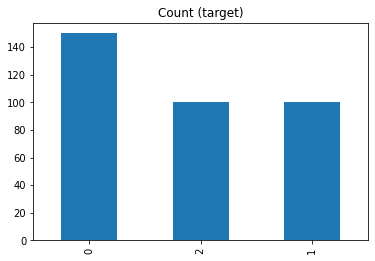

In [ ]:
y_train.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import statistics

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

models = [
    LogisticRegression(multi_class='multinomial'),
    XGBClassifier(
        max_depth=6,
        gamma=2,
        eta=0.8,
        reg_alpha=0.5,
        reg_lambda=0.5
      ),
    # LogisticRegression(),
    svm.SVC(decision_function_shape='ovr', probability=True),
    RandomForestClassifier(n_estimators=10),
    AdaBoostClassifier(n_estimators=25, learning_rate=2),
    # get_model(X_train.shape[1], 1)
]

# preds = pd.DataFrame()
acc_arr = []
for i in range(10):
  preds = []
  weights = [1, 1, 1, 1, 1, 1, 1, 1, 1]
  for i, m in enumerate(models):
    
    m.fit(X_train, y_train)
    preds.append(m.predict_proba(X_test[['Size','NB']]) * weights[i])


  preds_ensemble = [sum(items)/sum(weights) for items in zip(*preds)]
  preds_ensemble = np.argmax(preds_ensemble, axis=1)
  # preds_ensemble = le.inverse_transform(preds_ensemble)
  print('Pred:', list(preds_ensemble))
  acc = accuracy_score(y_test, preds_ensemble)
  print('Real:', list(y_test))
  print(acc)
  acc_arr.append(acc)

print("Average accuracy:", statistics.mean(acc_arr))

Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Pred: [0, 0, 2, 0, 0, 0, 0, 2]
Real: [0, 0, 2, 1, 0, 0, 0, 2]
0.875
Average accuracy: 0.875
